In [1]:
import RTBridge as rtb
import numpy as np
from functions import *
from scipy.signal import stft
import scipy.signal as signal
import math
from scipy.io import wavfile
import matplotlib.pyplot as plt
import wave

In [2]:

# Babbling
Experiment_ID = '02'
babbling_duration = 30
fs = 100


In [3]:

pxiWin10 = "169.254.172.223:5555"
pubPort = "5557"
bridge = rtb.BridgeSetup(pubPort, pxiWin10, rtb.setups.hand_4_4, milliTimeStep= int(10))


Python Subscriber connection successful!
Python Publisher connection successful!


In [4]:

activations = systemID_input_gen_func(babbling_duration, fs,0.5,0.05,1)
np.savetxt('activations'+Experiment_ID+'.txt', activations)

bridge.startConnection()
excursions = []
returned_excursions = []

_ = bridge.sendAndReceive([0.05]*4, 2)

for activation_set in activations:
	returned_excursions = bridge.sendAndReceive(activation_set)
	excursions.append(returned_excursions.copy())

_ = bridge.sendAndReceive([0.05]*4, 2)

print("\n\nTest has completed")


completed Startup


Test has completed


In [4]:

#training
logdir= './Music2.wav'
fs, preprocessed_music1 = music_preprocessing(logdir,clipping=False)   
spect_shape = (525,19*100) # (number of frequency samples,number of time samples)
music_spect_target = spect_preprocessing(logdir,clipping=True, spect_shape= spect_shape,duration=19)


In [3]:
#babbling data loading
logdir = './Babblings/Babbling_01.wav'
fs, preprocessed_music2 = music_preprocessing(logdir,clipping=False)   
spect_shape = (525,30000)
music_spect_Babbling = spect_preprocessing(logdir,clipping=True, spect_shape= spect_shape,duration= 305)
music_spect_Babbling = music_spect_Babbling[200:,:]

/Users/hesamazad/Downloads/PhD/Piano Hand Project/new works/functions.py:40: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read(file)


In [5]:
Experiment_ID = '01'
# inverse map 
logdir = './activations'+Experiment_ID+'.txt'
limb_activations = np.loadtxt(logdir)
limb_activations = limb_activations[200:,:]

In [6]:

model = inverse_mapping_func(music_spect_Babbling,limb_activations,0.2)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/10


2023-04-03 19:05:43.750140: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-03 19:05:43.750249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-04-03 19:05:43.876796: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  1/745 [..............................] - ETA: 4:37 - loss: 0.8579 - mse: 0.0887

2023-04-03 19:05:44.075930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


740/745 [============================>.] - ETA: 0s - loss: 0.5668 - mse: 0.0740

2023-04-03 19:05:48.483302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


745/745 [==============================] - 5s 7ms/step - loss: 0.5668 - mse: 0.0740 - val_loss: 0.6198 - val_mse: 0.1016
Epoch 2/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5618 - mse: 0.0726 - val_loss: 0.6153 - val_mse: 0.0997
Epoch 3/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5612 - mse: 0.0724 - val_loss: 0.6196 - val_mse: 0.1028
Epoch 4/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5606 - mse: 0.0722 - val_loss: 0.6202 - val_mse: 0.1025
Epoch 5/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5600 - mse: 0.0719 - val_loss: 0.6243 - val_mse: 0.1049
Epoch 6/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5598 - mse: 0.0719 - val_loss: 0.6176 - val_mse: 0.1018
Epoch 7/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5593 - mse: 0.0717 - val_loss: 0.6249 - val_mse: 0.1053
Epoch 8/10
745/745 [==============================] - 5s 6ms/step - loss: 0.5590 - mse:

In [12]:
x = model.predict(music_spect_Babbling)

932/932 [==============================] - 2s 2ms/step


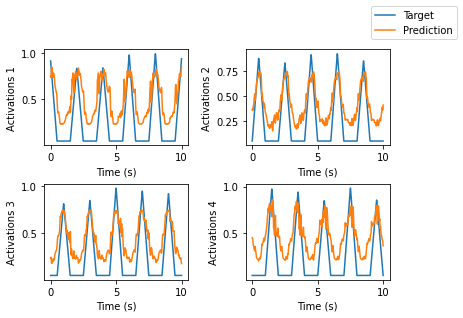

In [39]:
for k in range(4):
    t = np.linspace(0,10,1000)
    plt.subplot(2,2,k+1)
    plt.plot(t,limb_activations[0:1000,k],label= 'Target')
    plt.plot(t,1.8*x[80:1080,k],label= 'Prediction')
    plt.xlabel('Time (s)')
    plt.ylabel('Activations '+str(k+1))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

    if k==1:
        plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
plt.show()

In [7]:

# Training initialization
pxiWin10 = "169.254.172.223:5555"
pubPort = "5557"
bridge = rtb.BridgeSetup(pubPort, pxiWin10, rtb.setups.hand_4_4, 10)


Python Subscriber connection successful!
Python Publisher connection successful!


In [10]:

predicted_limb_activations = 2*gen_activations_from_spect(music_spect_target,model)
bridge.startConnection()
_ = bridge.sendAndReceive([0.05]*4, 2)

excursions = []
returned_excursions = []
for activation_set in predicted_limb_activations[100:,:]:
	returned_excursions = bridge.sendAndReceive(activation_set)
	excursions.append(returned_excursions.copy())

_ = bridge.sendAndReceive([0.05]*4, 2)


print("\n\nTest has completed")

60/60 [==============================] - 0s 2ms/step
completed Startup


Test has completed


In [ ]:
#training    
logdir = './Training1.wav'
fs, preprocessed_music3 = music_preprocessing(logdir,clipping=True,duration=28)   
spect_shape = (525,2800)
music_spect_training = spect_preprocessing(logdir,clipping=True, spect_shape= spect_shape,duration=28)

# concatenate
limb_activations = np.concatenate((limb_activations,predicted_limb_activations))
music_spect = np.concatenate((music_spect_Babbling,music_spect_training))

# new map
model = inverse_mapping_func(music_spect,limb_activations,0.2)


# This needs to be tested

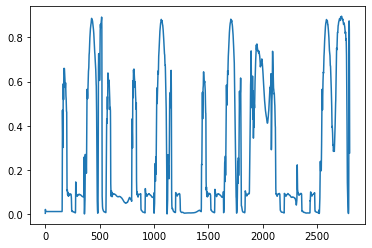

In [19]:
plt.plot(predicted_limb_activations[:,0])

In [7]:
import time
import numpy as np

start_time = time.time()

for k in range(1000):
    print(k)
stop_time = time.time()

duration = stop_time-start_time
print(type(duration))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

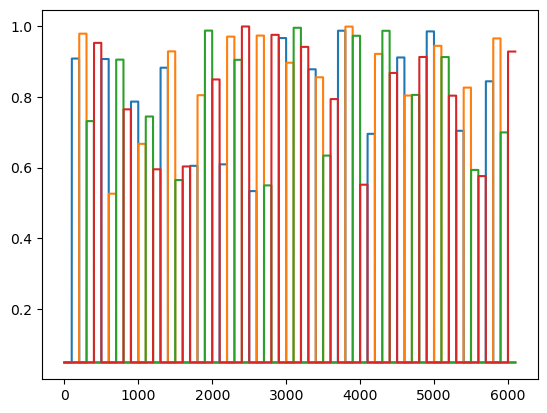

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x =np.loadtxt('./Activations/Experiment_v0_02_activations.txt')
plt.plot(x)

In [2]:
logdir = './output.wav'
x = spect_preprocessing(logdir,False,1800)


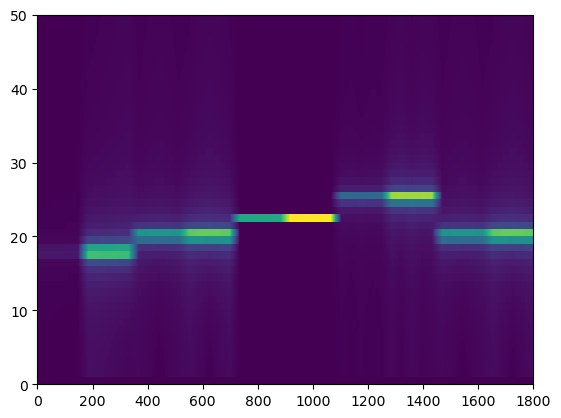

In [3]:

plt.pcolormesh(np.transpose(x[:,0:50]))